# `ES 157` Section 3: Modeling COVID cases

This week we will use everything we've been learning in class about systems and the Fourier transform so far, in order to make a simplistic model for the daily COVID cases. As a reminder from the first notebook, this is the data that we will work with.

![covid_mass](https://i.imgur.com/bI1umxq.png)

At the end of this notebook you will
1. have used `pandas` and `python` to clean up data,
2. have used the Fourier transform to analyze data, and
3. have created a simple model for the daily new cases.

As we always, let us import some needed libraries.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal
import pandas as pd

## Loading up COVID data 💉

Along with this week's notebook you should have downloaded some COVID data. In the introductory video, Demba mentioned the COVID tracker of the [John Hopkins University](https://coronavirus.jhu.edu/data/new-cases-50-states). That tracker, like most of the COVID dashboards, actually use data from [this](https://github.com/CSSEGISandData/COVID-19) GitHub repo. The data we provide were downloaded from the same repo a few weeks ago. Let's load the data from our favorite state.

In [2]:
# load the csv
csv_path = 'csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
csv = pd.read_csv(csv_path)

#check the data
csv

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,1188,1196,1196,1206,1218,1219,1235,1241,1240,1255
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,3710,3744,3791,3839,3877,3888,3906,3931,3957,3997
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,581,586,590,598,604,605,606,613,619,622
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,453,457,465,469,469,474,476,490,494,501
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,825,835,848,854,860,863,887,901,912,930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,373,375,383,385,389,390,393,394,398,399
3336,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,278,278,277,276,276,277,278,283,283,283
3337,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3338,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,82,86,96,97,97,100,102,104,106,106


We can see that the data have lots of columns that we probably don't need for our simple analysis. In fact, we see that the first `11` columns have extraneous information. Let's extract the data only for a specific state, and calculate the number of daily cases.

We see that the data is actually split into the numbers reported by each county. When trying to find the total number of daily cases, we have to aggregate the reported numbers by all the counties.

Another thing we need to consider is that each day actually reports the _total_ number of cases thus far. So, again, we have to acount for that in order to find the number of daily cases.

In [3]:
# extract the list of columns
columns = list(csv.columns)

# daily data are after column 11
days = columns[11:]

# restrict to your state's data
csv_mass = csv[csv['Province_State'] == 'Massachusetts']

# find the new daily cases
daily_new_cases = []
prev_sum = 0
for day in days:
    counties_sum = 0
    for county in csv_mass[day]:
        counties_sum += county
        
    daily_new_cases.append(counties_sum - prev_sum)
    prev_sum = counties_sum

## Plotting the data and the FFT

Now that we've cleaned up the data a little bit, let us try and plot them to make sure we get a sensible image.

**Optional**: create a sensible time axis using `pandas`/`matplotlib` (or, you might want to look into `plotly`; it has a lot of ways to manage plots with dates.)

(0.0, 213.0)

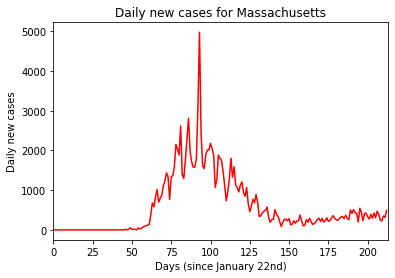

In [4]:
# plot the daily new cases
plt.plot(daily_new_cases, 'r')
plt.xlabel("Days (since January 22nd)")
plt.ylabel("Daily new cases")
plt.title("Daily new cases for Massachusetts")
plt.xlim([0, len(daily_new_cases)])

Okay, this looks good! It seems to be aligned with the image from the John Hopkins tracker. Let's examine now the frequency content of the daily new cases by using the _Fourier transform_.

Text(0.5, 1.0, 'Fourier transform of the daily new cases')

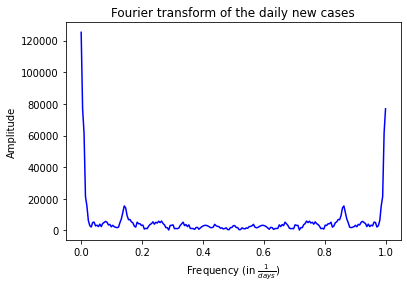

In [5]:
# plot the FFT of the daily new cases
fft_daily = np.fft.fft(daily_new_cases)

# create frequency axis
f_ax = np.linspace(0, 1, len(daily_new_cases))

# plot the fft
plt.plot(f_ax, np.abs(fft_daily), 'b')
plt.xlabel(r"Frequency (in $\frac{1}{days}$)")
plt.ylabel("Amplitude")
plt.title("Fourier transform of the daily new cases")

## Analyzing the Fourier transform

We see a very strong DC component in the Fourier transform of the signal. As we've talked about before, this is expected and encodes the mean of the signal. As a first analysis step, let's remove it and see if the image becomes clearer.

Text(0.5, 1.0, 'Zero-mean FFT of the daily cases')

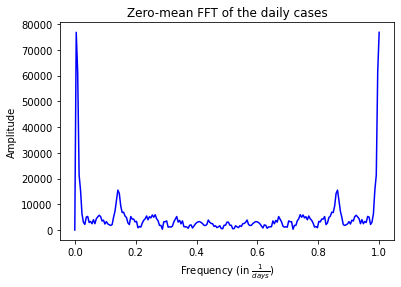

In [6]:
# remove the dc component from the FFT
fft_zero_mean = fft_daily
fft_zero_mean[0] = 0

# plot the fft
plt.plot(f_ax, np.abs(fft_zero_mean), 'b')
plt.xlabel(r"Frequency (in $\frac{1}{days}$)")
plt.ylabel("Amplitude")
plt.title("Zero-mean FFT of the daily cases")

We see a little bit clearer two symmetric peaks. What do they correspond to? Remember, our frequency axis is measured in _days_; therefore this implies that if we have a frequency $x$, then this means that the event happens every $\frac{1}{x}$ days (the period is the inverse of the frequency). Do the peaks make sense?

Now, let's try the following; reconstruct the signal using the inverse FFT, but zero out everything except the DC and the interval $[0.12, 0.17]$ (and its symmetric one.)

/usr/local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(0.0, 213.0)

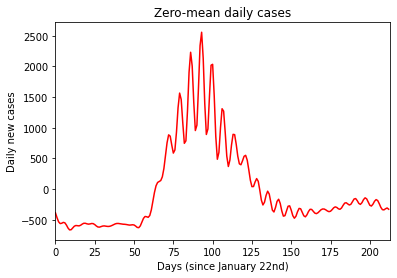

In [7]:
fft_recon = fft_daily

# find the indices of interest
start = int(0.05 * len(fft_recon))

before_first = int(0.12 * len(fft_recon))
after_first = int(0.17 * len(fft_recon))

before_second = int(0.83 * len(fft_recon))
after_second = int(0.88 * len(fft_recon))

end = int(0.95 * len(fft_recon))

# zero out everything except the parts of interest
fft_recon[start:before_first] = 0
fft_recon[after_first:before_second] = 0
fft_recon[after_second:end] = 0

# reconstruct the signal
reconstructed = np.fft.ifft(fft_recon)

# plot the reconstructed signal
plt.plot(reconstructed, 'r')
plt.xlabel("Days (since January 22nd)")
plt.ylabel("Daily new cases")
plt.title("Zero-mean daily cases")
plt.xlim([0, len(reconstructed)])

It turns out that our intuition was correct; the DC component and the frequency content we identified are able to give us a pretty good approximation of the original curve. Obviously, there's some information lost since we zero'ed out most of the Fourier transform; however, we get a fairly sensible image with only a few coefficients.

This idea is the basis of _compression_; we identify the most important coefficients in a base and we keep _only_ those coefficients.

## Trying to model COVID

Let's try and make a simple model for the COVID data. We will base our model on two observations
- first, we saw that the number of daily cases exhibit some sort of periodicity, and
- second, we see a Gaussian-shaped component.

The simplest periodic signal we know is a _sine_; therefore, we will try to model the daily new cases by using the product of a sine and a Gaussian distribution.

First, let us create a sine wave of the appropriate frequency.

(0.0, 213.0)

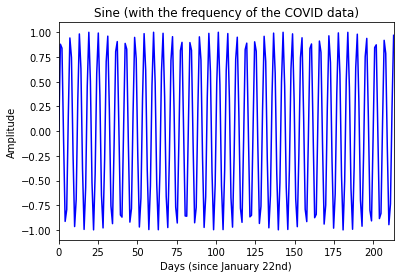

In [8]:
# create a time variable
t = np.linspace(0, len(days), len(days))

# choose an appropriate frequency/period
f_0 = 0.17

# create the sine
sine = np.sin(2 * np.pi * f_0 * t)

# plot the sine
plt.plot(t, sine, 'b')
plt.xlabel("Days (since January 22nd)")
plt.ylabel("Amplitude")
plt.title("Sine (with the frequency of the COVID data)")
plt.xlim([t[0], t[-1]])

Hmm, but our sine takes negative values. To get a clearer picture on our graph, we could make sure we only keep the parts that are above zero.

(0.0, 213.0)

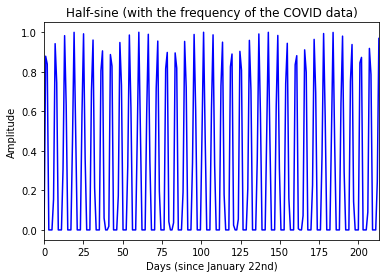

In [9]:
# keep only the positive part of the sine
half_sine = np.maximum(sine, 0)

# plot the sine
plt.plot(t, half_sine, 'b')
plt.xlabel("Days (since January 22nd)")
plt.ylabel("Amplitude")
plt.title("Half-sine (with the frequency of the COVID data)")
plt.xlim([t[0], t[-1]])

We're slowly making progress. 🤓 Let's move on to the Gaussian. As a reminder, the equation of a Gaussian distribution is given by
<center>$f(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2}\left(\frac{x - \mu}{\sigma}\right)^2}$.</center>
Around what day does the Gaussian seem to be centered? And what would you say is it's standard deviation?

Also, note that we need to acount for the height of the distribution. Notice that when $x = \mu$, the Gaussian simplifies to
<center>$f(\mu) = \frac{1}{\sigma \sqrt{2 \pi}}$.</center>
So, we should look at the corresponding desired height at that peak, and add an adjustment term to our distribution.

(0.0, 213.0)

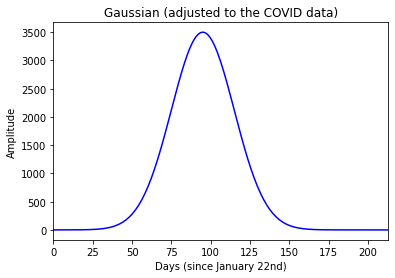

In [10]:
# make a guess for the mean and the std
mean = 95
std = 20

# find the adjustment term
height = 3500
adjustment = 3500 * std * np.sqrt(2 * np.pi)

# create the Gaussian
gaussian = adjustment * 1 / (std * np.sqrt(2 * np.pi)) * np.e ** (-1 / (2 * std ** 2) * (t - mean) ** 2)

# plot the Gaussian
plt.plot(t, gaussian, 'b')
plt.xlabel("Days (since January 22nd)")
plt.ylabel("Amplitude")
plt.title("Gaussian (adjusted to the COVID data)")
plt.xlim([t[0], t[-1]])

Okay, so now we have our Gaussian and we have our sine wave. Let's multiply them and plot the product in the same plot as the COVID data and see how we did.

(0.0, 213.0)

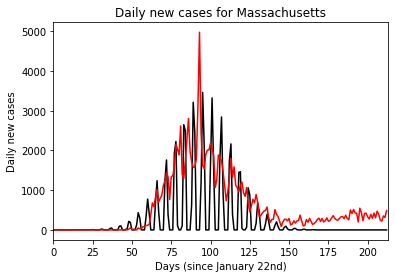

In [11]:
# multiply the signals
product = half_sine * gaussian

# plot the product signal
plt.plot(product, 'k')

# plot the covid data
plt.plot(daily_new_cases, 'r')

plt.xlabel("Days (since January 22nd)")
plt.ylabel("Daily new cases")
plt.title("Daily new cases for Massachusetts")
plt.xlim([0, len(daily_new_cases)])

It's obviously not perfect, but it's a simple approximation that captures the essential components of the data. I hope you enjoyed getting playing a bit with some real data and getting some experience with data science. Please take a minute to fill out this week's feedback [form]().

**Optional**: pay attention exactly on what _day_ are the spikes in the daily new cases reported. Can you think of any plausible reasons why this happens?

**Optional**: can you play around and create a better model for the COVID data? An idea would be to make sure that we don't have the valleys of zero in our product signal. Another thing you could try could involve convolution.